In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 64

# load and normalize MNIST
transform = transforms.Compose(
    [transforms.ToTensor()])#,
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')



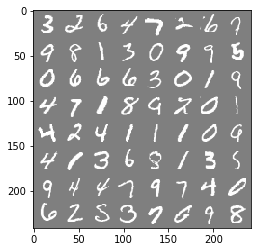

    3     2     6     4


torch.Size([64, 1, 28, 28])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
images.shape

In [5]:
# Define the network
import torch.nn as nn
import torch.nn.functional as F
from pdb import set_trace

# use_gpu = torch.cuda.is_available()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 10)

    def forward(self, x):
        set_trace()
        x = x.view(-1, 28 * 28) # flatten 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    
#### initialisation sample   

def weights_init(m):
    classname = m.__class__.__name__
    print(classname)
    if classname.find('Conv2d') != -1:
        #print(m.weight.data.shape, m.bias.data.shape)
        nn.init.normal_(m.weight.data, 0.0, 1.0)
        nn.init.constant_(m.bias.data, 0.0)
        # bias is the term in wx + b
    elif classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, 0.0, 1.0)
        nn.init.constant_(m.bias.data, 0.0)

    # uniform distribution
    #nn.init.uniform_(tensor, a=0, b=1)
    
    #normal distribution
    #nn.init.normal_(tensor, mean=0, std=1)
    #.........
net = Net()
    
print(net)
#net.apply(weights_init)

Net(
  (fc1): Linear(in_features=784, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)
max_epoch = 30

for epoch in range(max_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
#         if use_gpu:
#             inputs = inputs.cuda()
#             labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # backpropagation of the weights of linear layers as well as the convolutional layers
        optimizer.step() # dynamic learning rate

        # print statistics
        running_loss += loss.item()
        if i % 400 == 399:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   400] loss: 0.459
[1,   800] loss: 0.444
[2,   400] loss: 0.381
[2,   800] loss: 0.307
[3,   400] loss: 0.224
[3,   800] loss: 0.189
[4,   400] loss: 0.155
[4,   800] loss: 0.138
[5,   400] loss: 0.125
[5,   800] loss: 0.122
[6,   400] loss: 0.111
[6,   800] loss: 0.108
[7,   400] loss: 0.101
[7,   800] loss: 0.098
[8,   400] loss: 0.093
[8,   800] loss: 0.093
[9,   400] loss: 0.087
[9,   800] loss: 0.086
[10,   400] loss: 0.081
[10,   800] loss: 0.078
[11,   400] loss: 0.075
[11,   800] loss: 0.074
[12,   400] loss: 0.070
[12,   800] loss: 0.070
[13,   400] loss: 0.066
[13,   800] loss: 0.067
[14,   400] loss: 0.065
[14,   800] loss: 0.064
[15,   400] loss: 0.064
[15,   800] loss: 0.062
[16,   400] loss: 0.062
[16,   800] loss: 0.060
[17,   400] loss: 0.059
[17,   800] loss: 0.060
[18,   400] loss: 0.058
[18,   800] loss: 0.058
[19,   400] loss: 0.057
[19,   800] loss: 0.059
[20,   400] loss: 0.056
[20,   800] loss: 0.058
[21,   400] loss: 0.056
[21,   800] loss: 0.056
[22,   400

In [22]:
correct = 0
total = 0
flag = True
all_predicted = []
all_outputs = np.zeros((10000, 10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if (flag):
#             print(images)
            single_input = images
            print(images.shape)
            print('------------------------')
            print(labels.shape)
            lable = labels
            flag = False
        outputs = net(images)
        #from pdb import set_trace
        
        #print(outputs)
        #set_trace()
        all_outputs[len(all_predicted):len(all_predicted)+batch_size] = outputs
        #set_trace()
        _, predicted = torch.max(outputs.data, 1)
        all_predicted = np.concatenate((all_predicted, predicted))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

torch.Size([64, 1, 28, 28])
------------------------
torch.Size([64])
Accuracy of the network on the 10000 test images: 92 %


In [8]:
torch.save(net.state_dict(), "./datasets/nn1.pkl")

In [9]:
all_images = testloader.dataset.test_data
all_true_labels = testloader.dataset.test_labels

In [10]:
# save parameters as json file
# {
#   "layers": [2,2,1],
#   "input": [0.0, 0.0],
#   "label": 1,
#   "weights": {
#     "1": [[1.0,1.0],[1.0,1.0]],
#     "2": [[1.0], [-2.0]]
#   },
#   "biases": {
#     "1": [[0.0], [-1.0]],
#     "2": [[0.0]]
#   }
# }
import json
single_input_list = single_input[0][0].tolist()

# output = json.dumps(net.state_dict()["fc1.weight"].tolist())
output = {}

output_weights = {}
output_biases = {}
i = 1
for param_tensor in net.state_dict():
    if ('weight' in param_tensor):
        output_weights[str(i)] =  net.state_dict()[param_tensor].tolist()
        _T = [list(i) for i in zip(*output_weights[str(i)])]
        output_weights[str(i)] = _T
    if ('bias' in param_tensor):
        output_biases[str(i)] = net.state_dict()[param_tensor].tolist()
        i += 1
output['weights'] = output_weights
output['biases'] = output_biases

num_imgs = 500
for img in range(num_imgs):
    output['layers'] = [784, 8, 8, 8, 10] # [input, hidden layers, ..., output]
    output['input'] = all_images[img].flatten().tolist()
    output['label'] = all_true_labels.tolist()[img]
    output['predictedLabel'] = all_predicted[img]
    
    with open('./datasets/nn1/%s-%s-%s.json' % (img, output['label'], output['predictedLabel']), 'w') as f:
        json.dump(output, f)


In [12]:
np.shape(output_biases['1'])

(8,)

In [13]:
output_biases

{'1': [0.13380476832389832,
  0.061925482004880905,
  -0.18285037577152252,
  0.19886517524719238,
  0.5017507672309875,
  -0.2568775713443756,
  0.22805723547935486,
  0.2096123993396759],
 '2': [-0.15209223330020905,
  -0.1296592503786087,
  0.7242854237556458,
  0.21929575502872467,
  0.009476969949901104,
  -0.2730543315410614,
  0.6166206002235413,
  0.43183162808418274],
 '3': [-0.08349078893661499,
  0.24344348907470703,
  0.13453440368175507,
  0.17182005941867828,
  -0.7342982888221741,
  0.2009349763393402,
  0.3698563873767853,
  -0.34372472763061523],
 '4': [0.15720336139202118,
  0.22420883178710938,
  -0.25405195355415344,
  -1.4164299964904785,
  -0.05986475944519043,
  0.43815091252326965,
  0.1249549612402916,
  0.7643423080444336,
  -0.6055272221565247,
  -0.38726940751075745]}